<a href="https://colab.research.google.com/github/gomachinelearning/Blogs/blob/master/Natural_Language_Processing_Trump_and_Biden_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Orly Esteban
Aldie VA
MS Data Science, Indiana University

This code accompanies Orly Esteban's blog post at https://medium.com/@orly_esteban/analyzing-donald-trump-and-joe-biden-tweets-using-natural-language-processing-c6a357b11d68



In [ ]:
import requests
candidates = ['DonaldTrump', 'JoeBiden']
data = {}
for i, c in enumerate(candidates):
    url = "https://raw.githubusercontent.com/gomachinelearning/Blogs/master/" + c + "Tweets.txt"
    req = requests.get(url)
    data[c] = req.text

# check the sizes: Count the number of characters
print("Verify the dictionary variables are not empty. Print total number of characters in the variables:\n")
print("Donald Trump: {} , Joe Biden: {}".format(len(data['DonaldTrump']) ,len(data['JoeBiden'])))

def print_first_n_characters(n):
  if n == -1:
    print('Printing full tweets of each candidate \n'.format(n) )
  else:
    print('\n\nPrinting the first {} characters of tweets of each candidate \n'.format(n) )
    
  print('DONALD TRUMP: \n ' + data['DonaldTrump'][0:n])  
  print('\n\nJOE BIDEN: \n ' + data['JoeBiden'][0:n])


print_first_n_characters(500)

Verify the dictionary variables are not empty. Print total number of characters in the variables:

Donald Trump: 449451 , Joe Biden: 672277


Printing the first 500 characters of tweets of each candidate 

DONALD TRUMP: 
 https://t.co/0LKTMOgk1T
RT @charliekirk11: This man is NOT black according to Joe Biden

Maybe Joe just doesn’t want him spreading the TRUTH about the Democrat Par…
RT @realDonaldTrump: Joe Biden’s rally. ZERO enthusiasm! https://t.co/IB2BrrmTPH
Watch Live: Trump Supporters Descend on Tulsa on Eve of Trump Rally https://t.co/0NxMjzvQdt via @BreitbartNews Thank you to all. See you tonight in Tulsa!
The D.C. Police are not doing their job as they watch a statue be ripped down &amp; burn. The


JOE BIDEN: 
 I know it can be hard to keep faith that we will ever achieve that more perfect union we strive to be. But ours is a union worth fighting for — and we are all called to the cause.

None of us can turn away. None of us can stay silent.
Donald Trump’s failure to fight t

In [ ]:
import pickle
import cloudpickle as cp
lst_donald_trump_tweets=[]
lst_joe_biden_tweets=[]

from urllib.request import urlopen
lst_donald_trump_tweets = cp.load(urlopen("https://raw.githubusercontent.com/gomachinelearning/Blogs/master/DonaldTrumpTweets.pickle"))
lst_joe_biden_tweets = cp.load(urlopen("https://raw.githubusercontent.com/gomachinelearning/Blogs/master/JoeBidenTweets.pickle"))
print("AVerage Number of characters per tweet:\n")
print("Donald Trump: {} , Joe Biden: {}".format(round(len(data['DonaldTrump'])/len(lst_donald_trump_tweets)) , round(len(data['JoeBiden'])/len(lst_joe_biden_tweets))))



AVerage Number of characters per tweet:

Donald Trump: 139 , Joe Biden: 208


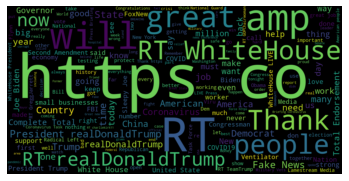

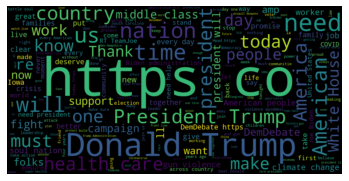

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud( background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

def show_word_cloud(data, candidate):
  text = data[candidate]
  wordcloud = WordCloud(width=1600, height=800).generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
show_word_cloud(data,'DonaldTrump')
show_word_cloud(data,'JoeBiden')

In [ ]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

dict_dtm={}
  
def document_term_matrix(strTweets):  
  data_cv = cv.fit_transform([strTweets]) 
  return pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
  
dict_dtm['DonaldTrump'] = document_term_matrix(data['DonaldTrump'])
dict_dtm['JoeBiden'] = document_term_matrix(data['JoeBiden'])
print('Donald Trump Tweets Document Term Matrix:\n')
print(dict_dtm['DonaldTrump'])
print('\n\n')
print('Joe Biden Tweets Document Term Matrix:\n')
print(dict_dtm['JoeBiden'])

Donald Trump Tweets Document Term Matrix:

   00  000  0022  00pme  ...  zzkubjloot  zzl9jebv7c  𝗳𝗶𝘃𝗲  𝗺𝗶𝗹𝗹𝗶𝗼𝗻
0  25   45     1      1  ...           1           1     1        1

[1 rows x 8731 columns]



Joe Biden Tweets Document Term Matrix:

   00  000  02g73q45dr  047lsdtrqn  ...  zzmlhu3cqi  única  únicas  único
0  11   25           1           1  ...           1      1       1      1

[1 rows x 9100 columns]


In [ ]:
def top_n_words(dict_dtm,n):

  top_dict = {}
  #data = dict_dtm[candidate]
  for c in dict_dtm.columns:
    
    top_dict[c]=dict_dtm[c][0]
  sort_orders = sorted(top_dict.items(), key=lambda x: x[1], reverse=True)
  for i in sort_orders[0:n]:
    print(i[0], i[1])

print('Donald Trump:\n')
top_n_words(dict_dtm['DonaldTrump'],20)
print('\n\nJoe Biden:\n')
top_n_words(dict_dtm['JoeBiden'],20)

Donald Trump:

rt 1761
https 1225
realdonaldtrump 408
amp 395
great 389
president 272
people 245
thank 216
trump 214
news 203
coronavirus 186
whitehouse 184
just 163
new 158
american 144
fake 142
joe 130
america 127
country 125
today 121


Joe Biden:

https 2385
trump 943
president 801
donald 529
need 429
country 365
nation 360
american 329
people 308
ll 296
health 290
today 281
time 280
america 274
care 272
day 270
make 268
ve 244
just 232
americans 209


In [ ]:

import re
import string

def clean_tweets(tweets):
    '''Make tweetslowercase, remove tweetsin square brackets, remove punctuation and remove words containing numbers.'''
    tweets= tweets.lower()
    tweets= re.sub('\[.*?\]', '', tweets)
    tweets= re.sub('[%s]' % re.escape(string.punctuation), '', tweets)
    tweets= re.sub('\w*\d\w*', '', tweets)
    tweets= re.sub('[‘’“”…]', '', tweets)
    tweets= re.sub('\n', '', tweets)
    tweets= re.sub('\r', ' ', tweets)    
    tweets = re.sub(r'^https?:\/\/.*[\r\n]*', '', tweets, flags=re.MULTILINE)
    tweets = re.sub(r'http\S+', '', tweets)
    tweets = tweets.replace(' amp ','')
    tweets = tweets.replace(' rt ','')
    tweets = tweets.replace('realdonaldtrump','')
    return tweets 


clean_data={}
clean_data['DonaldTrump'] = clean_tweets(data['DonaldTrump'])#[0:100000]
clean_data['JoeBiden'] = clean_tweets(data['JoeBiden']) #[0:100000]

len(clean_data['DonaldTrump']) ,len(clean_data['JoeBiden'])


(378461, 589787)

In [ ]:
print('Donald Trump: {}'.format(len(data['DonaldTrump'])))
print('Joe Biden: {}'.format(len(data['JoeBiden'])))

Donald Trump: 449451
Joe Biden: 672277


In [ ]:
print('Print 200 characters only:\n')
print('Donald Trump raw data:\n')
print(data['DonaldTrump'][0:200])
print('\n\nDonald Trump clean data:\n')
print(clean_data['DonaldTrump'][0:200])

print('\n\n')

print('Joe Biden raw data:\n')
print(data['JoeBiden'][0:200])
print('\n\nJoe Biden clean data:\n')
print(clean_data['JoeBiden'][0:200])

Print 200 characters only:

Donald Trump raw data:

https://t.co/0LKTMOgk1T
RT @charliekirk11: This man is NOT black according to Joe Biden

Maybe Joe just doesn’t want him spreading the TRUTH about the Democrat Par…
RT @realDonaldTrump: Joe Biden’


Donald Trump clean data:

 this man is not black according to joe biden  maybe joe just doesnt want him spreading the truth about the democrat par joe bidens rally zero enthusiasm  watch live trump supporters descend on tulsa 



Joe Biden raw data:

I know it can be hard to keep faith that we will ever achieve that more perfect union we strive to be. But ours is a union worth fighting for — and we are all called to the cause.

None of us can tu


Joe Biden clean data:

i know it can be hard to keep faith that we will ever achieve that more perfect union we strive to be but ours is a union worth fighting for — and we are all called to the cause  none of us can turn a


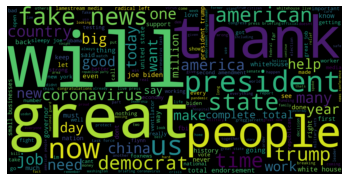

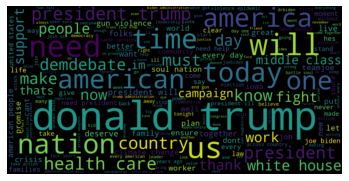

In [ ]:
show_word_cloud(clean_data,'DonaldTrump')
show_word_cloud(clean_data,'JoeBiden')


In [ ]:
dict_dtm['DonaldTrump'] = document_term_matrix(clean_data['DonaldTrump'])
dict_dtm['JoeBiden'] = document_term_matrix(clean_data['JoeBiden'])

print('Donald Trump:\n')
top_n_words(dict_dtm['DonaldTrump'],20)
print('\n\nJoe Biden:\n')
top_n_words(dict_dtm['JoeBiden'],20)

Donald Trump:

great 387
president 269
people 236
thank 216
news 201
trump 185
coronavirus 182
just 162
new 157
american 141
fake 137
joe 126
big 117
country 116
today 114
media 105
doing 104
states 104
democrats 103
job 103


Joe Biden:

president 795
trump 781
donald 529
need 429
country 354
nation 334
im 327
american 320
people 307
health 289
time 279
care 271
make 266
day 260
today 257
just 232
americans 210
demdebate 200
america 193
ill 192


In [ ]:
#Note: install TextBlob if needed
#!pip install textblob

In [ ]:

from textblob import TextBlob
statements=[]
statements.append("I will vote for that mayor again!")
statements.append("I will vote for that good mayor again!")
statements.append("The senator is the worst politician ever!")
statements.append("Make America Great Again")
statements.append("Keep America Great")
statements.append("OUR BEST DAYS STILL LIE AHEAD")
statements.append("The earth revolves around the sun")
statements.append("The sun revolves around the earth")
statements.append("I'd really truly love going out in this weather!")


lst_sentiment_analysis=[]
for statement in statements:
  blob = TextBlob(statement)
  print(statement + ' ' + str(blob.sentiment))

I will vote for that mayor again! Sentiment(polarity=0.0, subjectivity=0.0)
I will vote for that good mayor again! Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
The senator is the worst politician ever! Sentiment(polarity=-1.0, subjectivity=1.0)
Make America Great Again Sentiment(polarity=0.8, subjectivity=0.75)
Keep America Great Sentiment(polarity=0.8, subjectivity=0.75)
OUR BEST DAYS STILL LIE AHEAD Sentiment(polarity=1.0, subjectivity=0.3)
The earth revolves around the sun Sentiment(polarity=0.0, subjectivity=0.0)
The sun revolves around the earth Sentiment(polarity=0.0, subjectivity=0.0)
I'd really truly love going out in this weather! Sentiment(polarity=0.4125, subjectivity=0.4)


In [ ]:


lst_donald_trump_polarity = []
lst_donald_trump_subjectivity  = []

lst_joe_biden_polarity = []
lst_joe_biden_subjectivity  = []

#number of tweets to analyze
n=200 

def sentiment_analysis(lst_tweets,lst_polarity, lst_subjectivity):
  for tweet in lst_tweets[0:n]:
    blob = TextBlob(clean_tweets(tweet))
    lst_polarity.append(blob.polarity)
    lst_subjectivity.append(blob.subjectivity)

sentiment_analysis(lst_donald_trump_tweets,lst_donald_trump_polarity,lst_donald_trump_subjectivity) 
sentiment_analysis(lst_joe_biden_tweets,lst_joe_biden_polarity,lst_joe_biden_subjectivity) 


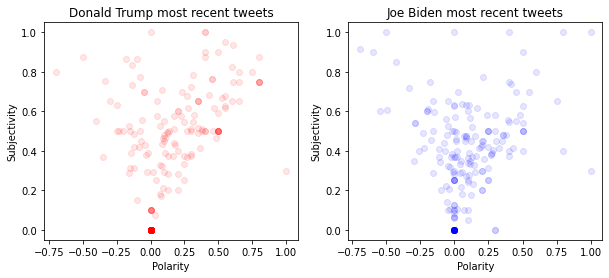

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(lst_donald_trump_polarity,lst_donald_trump_subjectivity,'ro',alpha=0.1)
plt.title("Donald Trump most recent tweets")
plt.ylabel('Subjectivity')
plt.xlabel('Polarity')

plt.subplot(1,2,2)
plt.plot(lst_joe_biden_polarity,lst_joe_biden_subjectivity,'bo',alpha=0.1)
plt.title("Joe Biden most recent tweets")
plt.ylabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()



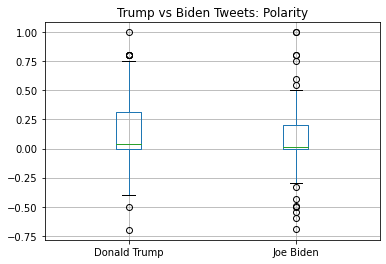

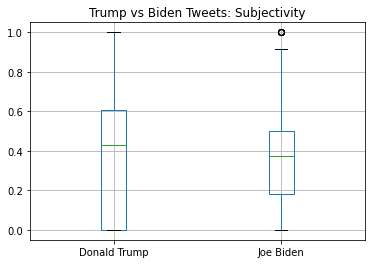

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.c_[np.array(lst_donald_trump_polarity),np.array(lst_joe_biden_polarity)], columns=['Donald Trump','Joe Biden'])
df.plot.box(grid='True', title='Trump vs Biden Tweets: Polarity')

df = pd.DataFrame(np.c_[np.array(lst_donald_trump_subjectivity),np.array(lst_joe_biden_subjectivity)], columns=['Donald Trump','Joe Biden'])
df.plot.box(grid='True', title='Trump vs Biden Tweets: Subjectivity')

In [ ]:
#install gensim as needed
#!pip install gensim
from gensim import matutils, models
import scipy.sparse

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()
from nltk import word_tokenize, pos_tag

def get_corpus(dtm):  
  sparse_counts = scipy.sparse.csr_matrix(dtm)
  corpus = matutils.Sparse2Corpus(sparse_counts)
  return corpus

# tokenize nouns and adjectives only
def nouns_adjectives(text):
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [lemmatizer.lemmatize(word) for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]     
    return ' '.join(nouns_adj)


def generate_topics(str_tweets):
  dtm = document_term_matrix(str_tweets)
  corpus = get_corpus(dtm)  
  id2word = dict((v, k) for k, v in cv.vocabulary_.items())
  lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=1, passes=100,minimum_probability =0.5)
  return lda


In [ ]:
import matplotlib.gridspec as gridspec

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def print_topics(candidate,index_from,index_to): 
  n_topics = 1
  dtm = document_term_matrix(nouns_adjectives(clean_data[candidate][index_from:index_to]))
  corpus =get_corpus(dtm)
  id2word = dict((v, k) for k, v in cv.vocabulary_.items())

  lda = models.LdaModel(corpus, num_topics = n_topics, id2word = id2word, passes=50)
  topics  = [[topic for topic,_ in lda.show_topic(topic_id, topn=5)] for topic_id in range(lda.num_topics)]
  top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=5)] for topic_id in range(lda.num_topics)]
  print(topics)       
  
print_topics('DonaldTrump',0,1000)
print_topics('JoeBiden',0,1000)

print_topics('DonaldTrump',1000,2000)
print_topics('JoeBiden',1000,2000)

print_topics('DonaldTrump',2000,3000)
print_topics('JoeBiden',2000,3000)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[['abandon', 'proven', 'rice', 'rally', 'police']]
[['ad', 'perfect', 'rest', 'recovery', 'promise']]
[['bidens', 'riotinglooting', 'seattle', 'school', 'safe']]
[['ability', 'mother', 'power', 'ng', 'nation']]
[['amendment', 'people', 'rogers', 'respected', 'point']]
[['american', 'promise', 'right', 'ready', 'roadmap']]
